In [65]:
import numpy as np
import pennylane as q
import multiprocessing as mp
import matplotlib.pyplot as plt
from original_grover_noise import original_grover_iter
from exact_grover_noise import modified_grover_iter
from original_grover_noise_v2 import original_grover_iter as og
from exact_grover_noise_v2 import modified_grover_iter as mg

In [66]:
def DEGA(target_combo, p):
    n_bits = len(target_combo)
    all_wires = list(range(n_bits))
    dev = q.device("default.mixed", wires=n_bits, shots=1000, seed=42)

    @q.qnode(dev)
    def inner_circuit():
        if n_bits%2:
            if len(target_combo) != 3:
                for i in range((len(target_combo)-3)//2):
                    original_grover_iter([int(target_combo[i*2]), int(target_combo[2*i+1])], p, list(range(2*i,2*i+2)))
            modified_grover_iter([int(target_combo[-3]), int(target_combo[-2]), int(target_combo[-1])], p, [n_bits-3,n_bits-2,n_bits-1])
        else:
            for i in range(len(target_combo)//2):
                original_grover_iter([int(target_combo[i*2]), int(target_combo[2*i+1])], p, list(range(2*i,2*i+2)))
    
        return q.probs(wires=all_wires)
    return inner_circuit()

def get_plot(combo, values):
    n=len(combo)
    categories = np.vectorize(lambda x: np.binary_repr(x, width=n))(np.arange(2**n)).tolist()
    plt.bar(categories, values, color='skyblue')
    plt.xticks(rotation=90)
    plt.title(f'{len(combo)}-qubit, target={combo}')
    plt.ylabel('Probability')
    plt.show()

In [78]:
test_combo=[0,0,1,1,0]
noise_param=np.arange(0, 0.091, 0.01)
dega_res=[]
og_res=[]
mg_res=[]
for p in noise_param:
    dega_res.append(DEGA(test_combo, p)[6])
    og_res.append(og(test_combo, p)[6])
    mg_res.append(mg(test_combo, p)[6])

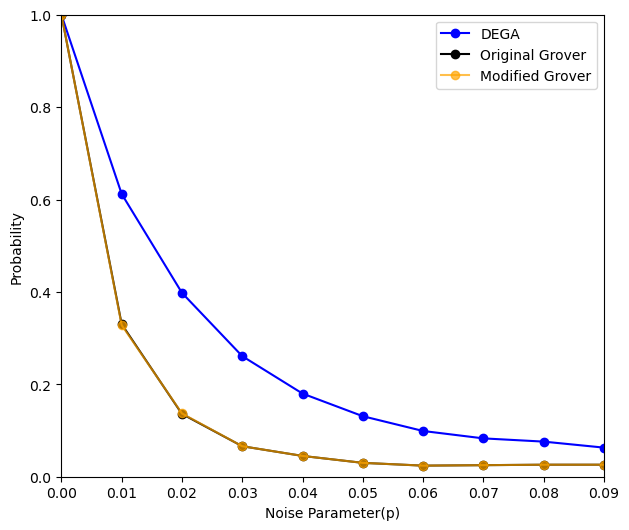

In [108]:
plt.figure(figsize=(7, 6))
plt.plot(noise_param, dega_res, label='DEGA',  linestyle='-', marker='o', color='blue')
plt.plot(noise_param, og_res, label='Original Grover', linestyle='-', marker='o', color='black')
plt.plot(noise_param, mg_res, label='Modified Grover', linestyle='-', marker='o', color='orange', alpha=0.7)
plt.xlabel('Noise Parameter(p)')
plt.ylabel('Probability')
plt.legend(loc='upper right')
plt.xlim([0, 0.09])
plt.ylim([0, 1])
plt.show()